In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

In [3]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x): #how data will flow
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1) #dim is similar to axes, which thing we want to sum to 1, classes, dim=0 batches, dim=1 output tensors
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [5]:
X = torch.rand((28,28))
X = X.view(-1, 28*28) #-1 or 1 specifies this input is of unknown shape, any amount of data, any size

In [6]:
X

tensor([[1.3701e-01, 8.6258e-01, 8.1131e-01, 3.3978e-01, 5.6041e-01, 1.7871e-01,
         7.0201e-01, 9.0366e-01, 2.3984e-01, 6.4894e-01, 8.9459e-01, 2.0224e-01,
         3.0065e-01, 9.3213e-01, 4.1174e-01, 6.1911e-01, 3.2761e-02, 8.6420e-01,
         2.9420e-01, 7.5112e-01, 3.1752e-01, 2.3166e-01, 1.3140e-01, 2.1826e-01,
         6.3806e-01, 3.4232e-01, 9.8145e-01, 9.1253e-01, 3.7485e-01, 5.9274e-01,
         5.3883e-01, 4.8782e-01, 7.6988e-01, 9.3271e-01, 2.2220e-01, 9.7222e-01,
         7.2229e-01, 4.9664e-01, 1.4347e-01, 9.2758e-01, 9.5139e-01, 2.7097e-01,
         7.9688e-01, 7.7217e-01, 9.9675e-01, 8.1293e-02, 6.9044e-01, 4.1908e-01,
         2.6300e-01, 5.4073e-01, 5.4939e-01, 6.6409e-01, 2.6812e-01, 6.3764e-01,
         2.3129e-01, 1.5799e-01, 7.6656e-01, 6.1866e-01, 7.8757e-02, 9.6516e-01,
         6.4713e-01, 6.4285e-01, 2.7198e-01, 5.2218e-01, 4.7181e-01, 5.8316e-01,
         7.9755e-01, 7.6465e-01, 6.6418e-01, 2.2116e-01, 8.9862e-01, 9.6037e-01,
         1.0097e-01, 1.4093e

In [7]:
output = net(X)
output

tensor([[-2.3951, -2.2063, -2.1525, -2.3594, -2.2815, -2.2574, -2.4473, -2.1634,
         -2.4161, -2.4017]], grad_fn=<LogSoftmaxBackward>)

In [13]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr =  0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels
        X,y = data
        #print(X[0])
        #print(y[0])
        #break
        net.zero_grad() #eveytime we pass data through network, we need to start with this
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y) #nll_loss for scalar data lables, mean square for one-hot
        loss.backward()
        optimizer.step() #will adjust weights for us    
    print(loss)

tensor(0.3224, grad_fn=<NllLossBackward>)
tensor(0.0097, grad_fn=<NllLossBackward>)
tensor(0.1807, grad_fn=<NllLossBackward>)


In [18]:
correct = 0
total = 0

with torch.no_grad():
    #for validation we dont want to calculate gradients
    #for every pred does it match actual label
    for data in trainset:
        X,y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total += 1
print ("Accuracy: ", round(correct/total, 3))

Accuracy:  0.98


In [19]:
correct = 0
total = 0

with torch.no_grad():
    #for validation we dont want to calculate gradients
    #for every pred does it match actual label
    for data in testset:
        X,y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total += 1
print ("Accuracy: ", round(correct/total, 3))

Accuracy:  0.971


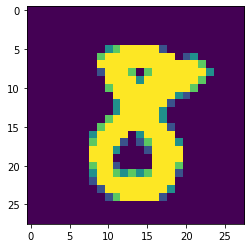

In [22]:
import matplotlib.pyplot as plt

plt.imshow(X[1].view(28,28))
plt.show() #actual

In [24]:
print(torch.argmax(net(X[1].view(-1,784))[0])) #prediction

tensor(8)
